In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from pyspark.sql import SparkSession

s3_path="s3://nyc-taxi-final-megha/raw/yellow_tripdata_2025-03.parquet"

df=pd.read_parquet(s3_path, engine="pyarrow")

/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/fsspec/registry.py:286: UserWarning: Your installed version of s3fs is very old and known to cause
severe performance issues, see also https://github.com/dask/dask/issues/10276

To fix, you should specify a lower version bound on s3fs, or
update the current installation.

  warnings.warn(s3_msg)


In [ ]:
df.info()
df.describe()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4145257 entries, 0 to 4145256
Data columns (total 20 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int32         
 1   tpep_pickup_datetime   datetime64[ns]
 2   tpep_dropoff_datetime  datetime64[ns]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int32         
 8   DOLocationID           int32         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  Airport_fee           

In [3]:
df.isnull().sum()

VendorID                      0
tpep_pickup_datetime          0
tpep_dropoff_datetime         0
passenger_count          916663
trip_distance                 0
RatecodeID               916663
store_and_fwd_flag       916663
PULocationID                  0
DOLocationID                  0
payment_type                  0
fare_amount                   0
extra                         0
mta_tax                       0
tip_amount                    0
tolls_amount                  0
improvement_surcharge         0
total_amount                  0
congestion_surcharge     916663
Airport_fee              916663
cbd_congestion_fee            0
dtype: int64

In [4]:
df_clean=df.dropna()

In [5]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3228594 entries, 0 to 3228593
Data columns (total 20 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int32         
 1   tpep_pickup_datetime   datetime64[ns]
 2   tpep_dropoff_datetime  datetime64[ns]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int32         
 8   DOLocationID           int32         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  Airport_fee           

In [6]:
df_clean['pickup_hour']=df_clean['tpep_pickup_datetime'].dt.hour

/tmp/ipykernel_13727/3632177816.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['pickup_hour']=df_clean['tpep_pickup_datetime'].dt.hour


In [7]:
df_clean.loc[:, 'pickup_hour']=df_clean['tpep_pickup_datetime'].dt.hour

/tmp/ipykernel_13727/180723591.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean.loc[:, 'pickup_hour']=df_clean['tpep_pickup_datetime'].dt.hour


In [9]:
df_clean[['tpep_pickup_datetime','pickup_hour']].head()

,tpep_pickup_datetime,pickup_hour
0,2025-03-01 00:17:16,0
1,2025-03-01 00:37:38,0
2,2025-03-01 00:24:35,0
3,2025-03-01 00:56:16,0
4,2025-03-01 00:01:44,0


<Axes: title={'center': 'NYC Taxi Trips by hour'}>

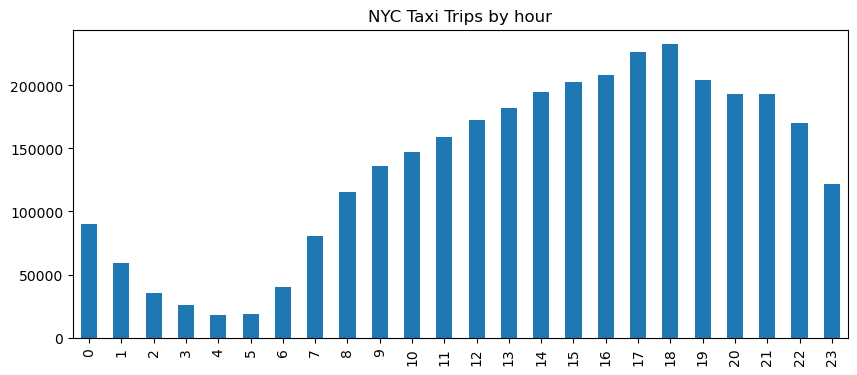

In [11]:
df_clean['pickup_hour'].value_counts().sort_index().plot(kind='bar', figsize=(10,4), title='NYC Taxi Trips by hour')

In [12]:
df_clean['fare_amount'].describe()

count    3.228594e+06
mean     1.798876e+01
std      3.212132e+01
min     -9.990000e+02
25%      8.600000e+00
50%      1.280000e+01
75%      2.050000e+01
max      4.626388e+04
Name: fare_amount, dtype: float64

In [13]:
df_fare=df_clean[(df_clean['fare_amount']>0) & (df_clean['fare_amount']<500)]

In [14]:
df_fare.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,cbd_congestion_fee,pickup_hour
0,1,2025-03-01 00:17:16,2025-03-01 00:25:52,1.0,0.90,1.0,N,140,236,1,...,3.50,0.5,2.60,0.0,1.0,15.50,2.5,0.0,0.00,0
1,1,2025-03-01 00:37:38,2025-03-01 00:43:51,1.0,0.60,1.0,N,140,262,1,...,3.50,0.5,2.30,0.0,1.0,13.80,2.5,0.0,0.00,0
2,2,2025-03-01 00:24:35,2025-03-01 00:39:49,1.0,1.94,1.0,N,161,68,1,...,1.00,0.5,5.16,0.0,1.0,25.81,2.5,0.0,0.75,0
3,2,2025-03-01 00:56:16,2025-03-01 01:01:35,2.0,0.95,1.0,N,231,13,1,...,1.00,0.5,2.59,0.0,1.0,15.54,2.5,0.0,0.75,0
4,1,2025-03-01 00:01:44,2025-03-01 00:10:00,1.0,1.50,1.0,N,163,236,1,...,4.25,0.5,2.85,0.0,1.0,17.20,2.5,0.0,0.75,0


In [15]:
df_fare.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'Airport_fee',
       'cbd_congestion_fee', 'pickup_hour'],
      dtype='object')

<Axes: >

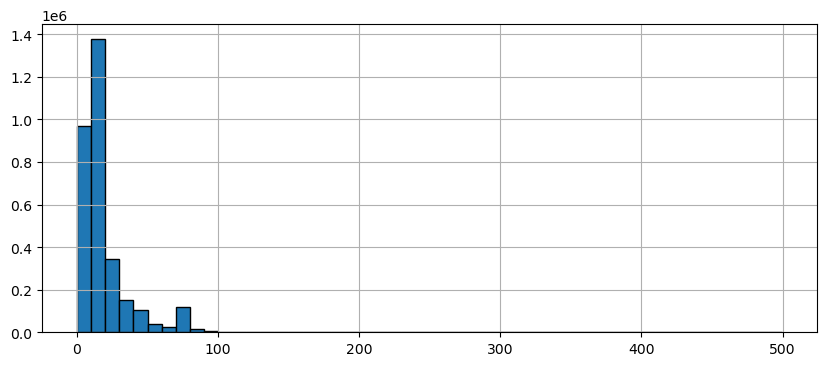

In [19]:
df_fare['fare_amount'].hist(bins=50, figsize=(10,4), edgecolor='black')

In [20]:
df_clean['tip_amount'].describe()

count    3.228594e+06
mean     3.565910e+00
std      4.004449e+00
min     -9.209000e+01
25%      1.000000e+00
50%      2.940000e+00
75%      4.410000e+00
max      2.900000e+02
Name: tip_amount, dtype: float64

In [5]:
df_filtered = df[(df['tip_amount'] >= 0) & (df['tip_amount'] <= 20)]


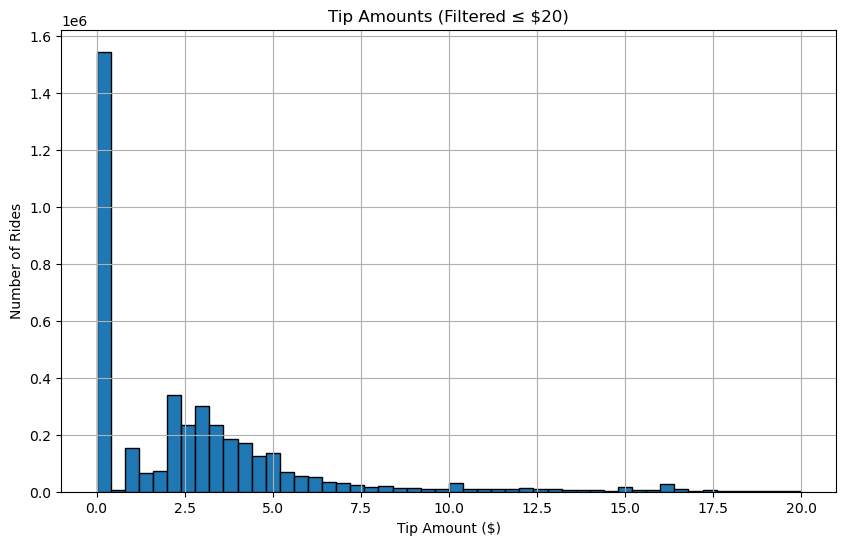

In [6]:
plt.figure(figsize=(10, 6))
plt.hist(df_filtered['tip_amount'], bins=50, edgecolor='black')
plt.title('Tip Amounts (Filtered ≤ $20)')
plt.xlabel('Tip Amount ($)')
plt.ylabel('Number of Rides')
plt.grid(True)
plt.show()

In [5]:
df_clean = df[(df['fare_amount']>0) & (df['tip_amount'] >=0) & (df['trip_distance'] >0)].dropna()

In [6]:
df_clean.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,cbd_congestion_fee
0,1,2025-03-01 00:17:16,2025-03-01 00:25:52,1.0,0.90,1.0,N,140,236,1,7.9,3.50,0.5,2.60,0.0,1.0,15.50,2.5,0.0,0.00
1,1,2025-03-01 00:37:38,2025-03-01 00:43:51,1.0,0.60,1.0,N,140,262,1,6.5,3.50,0.5,2.30,0.0,1.0,13.80,2.5,0.0,0.00
2,2,2025-03-01 00:24:35,2025-03-01 00:39:49,1.0,1.94,1.0,N,161,68,1,14.9,1.00,0.5,5.16,0.0,1.0,25.81,2.5,0.0,0.75
3,2,2025-03-01 00:56:16,2025-03-01 01:01:35,2.0,0.95,1.0,N,231,13,1,7.2,1.00,0.5,2.59,0.0,1.0,15.54,2.5,0.0,0.75
4,1,2025-03-01 00:01:44,2025-03-01 00:10:00,1.0,1.50,1.0,N,163,236,1,8.6,4.25,0.5,2.85,0.0,1.0,17.20,2.5,0.0,0.75


In [6]:
df_clean['pickup_hour'] = df_clean['tpep_pickup_datetime'].dt.hour

In [7]:
df_clean['tip_percent'] = (df_clean['tip_amount']/df_clean['fare_amount']) * 100

In [8]:
df_clean.to_csv('cleaned_taxi_data.csv', index = False)

In [9]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3122345 entries, 0 to 3228593
Data columns (total 22 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int32         
 1   tpep_pickup_datetime   datetime64[ns]
 2   tpep_dropoff_datetime  datetime64[ns]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int32         
 8   DOLocationID           int32         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  Airport_fee           